# Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой pytorch. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch

2. Создаем тензоры в pytorch

3. Работаем с градиентами руками

4. Моя первая нейросеть

# 1. Вспоминаем numpy и сравниваем операции в pytorch
Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm import tqdm

In [ ]:
a = np.random.rand(5, 3) # создали случайную матрицу
a

array([[0.51501423, 0.69886802, 0.55865515],
       [0.3653841 , 0.01326946, 0.95391969],
       [0.50000094, 0.74092178, 0.88659277],
       [0.19659511, 0.84142616, 0.03739522],
       [0.61658941, 0.34118253, 0.14114134]])

In [ ]:
print("Проверили размеры матрицы : %s\n" % (a.shape, ))

Проверили размеры матрицы : (5, 3)



In [ ]:
print("Добавили 5 к всем элементам матрицы : \n%s\n" % (a + 5))

Добавили 5 к всем элементам матрицы : 
[[5.51501423 5.69886802 5.55865515]
 [5.3653841  5.01326946 5.95391969]
 [5.50000094 5.74092178 5.88659277]
 [5.19659511 5.84142616 5.03739522]
 [5.61658941 5.34118253 5.14114134]]



In [ ]:
print("X * X^T : \n%s\n" % np.dot(a, a.T))

X * X^T : 
[[1.06575175 0.73036377 1.27061375 0.71018615 0.63484321]
 [0.73036377 1.0436444  1.03826233 0.11867004 0.36445678]
 [1.27061375 1.03826233 1.58501275 0.75488304 0.68621974]
 [0.71018615 0.11867004 0.75488304 0.74804603 0.41357638]
 [0.63484321 0.36445678 0.68621974 0.41357638 0.51650889]]



In [ ]:
print("Среднее по колонкам : \n%s\n" % np.mean(a, axis = 1))

Среднее по колонкам : 
[0.5908458  0.44419109 0.70917183 0.35847216 0.36630443]



In [ ]:
print("Изменили размеры : \n%s\n" % a.reshape(3, 5), "\nРазмеры стали : \n%s\n" % (a.reshape(3, 5).shape, ))

Изменили размеры : 
[[0.51501423 0.69886802 0.55865515 0.3653841  0.01326946]
 [0.95391969 0.50000094 0.74092178 0.88659277 0.19659511]
 [0.84142616 0.03739522 0.61658941 0.34118253 0.14114134]]
 
Размеры стали : 
(3, 5)



# Разминка

При помощи NumPy посчитать сумму квадратов натуральных чисел от 1 до 10000

In [ ]:
np.sum(np.arange(1, 10001) ** 2)

333383335000

Аналогичные операции в **PyTorch** выглядят следующим образом, синтаксис отличается, но совсем немного.

In [ ]:
x = torch.rand(5, 3)
x

tensor([[0.8029, 0.9295, 0.5648],
        [0.2401, 0.3846, 0.5954],
        [0.4076, 0.0725, 0.5171],
        [0.1806, 0.9065, 0.6651],
        [0.4294, 0.1746, 0.8620]])

In [ ]:
print("Проверили размеры : \n%s\n" % (x.shape, ))

Проверили размеры : 
torch.Size([5, 3])



In [ ]:
print("Добавили 5 : \n%s\n" % (x + 5))

Добавили 5 : 
tensor([[5.8029, 5.9295, 5.5648],
        [5.2401, 5.3846, 5.5954],
        [5.4076, 5.0725, 5.5171],
        [5.1806, 5.9065, 5.6651],
        [5.4294, 5.1746, 5.8620]])



In [ ]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @

print("X * X^T  (1): \n%s\n" % torch.matmul(x, x.transpose(1, 0)))
print("X * X^T  (1): \n%s\n" % x.mm(x.t()))

X * X^T  (1): 
tensor([[1.8274, 0.8865, 0.6867, 1.3632, 0.9938],
        [0.8865, 0.5601, 0.4336, 0.7880, 0.6834],
        [0.6867, 0.4336, 0.4388, 0.4833, 0.6334],
        [1.3632, 0.7880, 0.4833, 1.2967, 0.8091],
        [0.9938, 0.6834, 0.6334, 0.8091, 0.9579]])

X * X^T  (1): 
tensor([[1.8274, 0.8865, 0.6867, 1.3632, 0.9938],
        [0.8865, 0.5601, 0.4336, 0.7880, 0.6834],
        [0.6867, 0.4336, 0.4388, 0.4833, 0.6334],
        [1.3632, 0.7880, 0.4833, 1.2967, 0.8091],
        [0.9938, 0.6834, 0.6334, 0.8091, 0.9579]])



In [ ]:
# dim = 0 ____________ Столбцы
# dim = 1 ____________ Колонки

print("Среднее по колонкам: \n%s\n" % x.mean(dim = -1))

Среднее по колонкам: 
tensor([0.7657, 0.4067, 0.3324, 0.5841, 0.4887])



In [ ]:
print("Изменили размеры : \n%s\n" % (x.view([3, 5]).shape, ))
print("Изменили размеры по другому : \n%s\n" % (x.view_as(x.t()).shape, ))

# будьте внимательны и не используйте view для транспонирования осей
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры : 
torch.Size([3, 5])

Изменили размеры по другому : 
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy

# Разминка на **PyTorch**

При помощи **PyTorch** посчитайте сумму квадратов натуральных чисел от 1 до 10000

In [ ]:
torch.sum(torch.arange(1, 10001) ** 2)

tensor(333383335000)

# 2. Создаем тензоры в **PyTorch** и снова изучаем базовые операции.

In [ ]:
x = torch.empty(5, 3) # создаем пустой тензор
x

tensor([[3.1990e-29, 3.0869e-41, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 3.4548e-09]])

In [ ]:
x = torch.rand(5, 3) # случайный тензор
x

tensor([[0.4969, 0.4883, 0.7104],
        [0.7775, 0.2587, 0.8226],
        [0.9778, 0.4629, 0.5675],
        [0.3200, 0.6493, 0.3333],
        [0.2592, 0.1415, 0.4262]])

In [ ]:
x = torch.zeros(5, 3, dtype = torch.long) # тензор с нуля и указанием типа переменных
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [ ]:
x = torch.tensor([1, 2, 3, 4, 5]) # тензор из питоновского листа или массива NumPy
x

tensor([1, 2, 3, 4, 5])

In [ ]:
x = x.new_ones(5, 3, dtype = torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size(), sep = '\t')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)	torch.Size([5, 3])


In [ ]:
x = torch.rand_like(x, dtype = torch.float) # создаем тензор (случайный) с размерами как x
print(x, x.size(), sep = '\t')

tensor([[0.2617, 0.1594, 0.4914],
        [0.3271, 0.9000, 0.9192],
        [0.8696, 0.6146, 0.2952],
        [0.7633, 0.5828, 0.2863],
        [0.1106, 0.9118, 0.8654]])	torch.Size([5, 3])


In [ ]:
y = torch.rand(5, 3) # операция сложения 
print(x + y)

tensor([[0.9109, 1.0040, 0.8227],
        [0.5324, 1.4309, 1.1148],
        [1.1509, 0.8672, 0.9323],
        [1.6740, 0.9931, 0.5171],
        [0.9499, 1.3751, 1.2412]])


In [ ]:
z = torch.add(x, y) # еще один вариант сложения
z

tensor([[0.9109, 1.0040, 0.8227],
        [0.5324, 1.4309, 1.1148],
        [1.1509, 0.8672, 0.9323],
        [1.6740, 0.9931, 0.5171],
        [0.9499, 1.3751, 1.2412]])

In [ ]:
torch.add(x, y, out = z) # последний вариант сложения
z

tensor([[0.9109, 1.0040, 0.8227],
        [0.5324, 1.4309, 1.1148],
        [1.1509, 0.8672, 0.9323],
        [1.6740, 0.9931, 0.5171],
        [0.9499, 1.3751, 1.2412]])

In [ ]:
print(x * y)   # поэлементное сложение

tensor([[0.1699, 0.1346, 0.1628],
        [0.0672, 0.4778, 0.1798],
        [0.2447, 0.1553, 0.1881],
        [0.6951, 0.2391, 0.0661],
        [0.0928, 0.4224, 0.3252]])


In [ ]:
print(x @ y.t()) # матричное умножение

tensor([[0.4673, 0.2345, 0.4270, 0.4171, 0.4781],
        [1.2770, 0.7248, 0.9050, 0.8793, 1.0369],
        [1.1815, 0.5626, 0.5880, 1.1122, 1.1254],
        [1.0826, 0.5222, 0.5444, 1.0003, 1.0182],
        [1.1287, 0.6761, 0.8128, 0.6746, 0.8405]])


In [ ]:
print(x.mm(y.t())) # еще один вариант матричного умножения

tensor([[0.4673, 0.2345, 0.4270, 0.4171, 0.4781],
        [1.2770, 0.7248, 0.9050, 0.8793, 1.0369],
        [1.1815, 0.5626, 0.5880, 1.1122, 1.1254],
        [1.0826, 0.5222, 0.5444, 1.0003, 1.0182],
        [1.1287, 0.6761, 0.8128, 0.6746, 0.8405]])


In [ ]:
print(x.unsqueeze(0).shape) # добавили элемент в начало, аналог бродкастинга

torch.Size([1, 5, 3])


In [ ]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог бродкастинга

torch.Size([5, 3])


### Мы также можем делать обычные срезу и переводить матрицы назад в **NumPy** 

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


# 3. Работаем с градиентами руками

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, **что мы хотим следить за всеми тензорами, которые получаются из созданного**. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

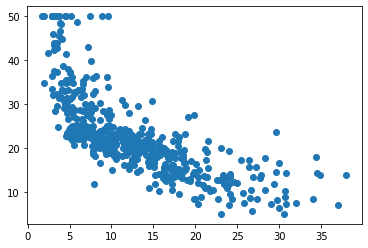

In [ ]:
# построим зависимость одного из 13 признаков датасета (последнего) от таргета
boston = load_boston();
plt.scatter(boston.data[:, -1], boston.target);

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

Напишем алгоритм для одной итерации по градиентному спуску.

In [ ]:
w = torch.rand(1, requires_grad = True) # размерность один, т.к. признак будет 1
b = torch.rand(1, requires_grad = True)


x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype = torch.double) # записываем данные в тензор, минмакс скейлим и устанавливаем тип дабл
y = torch.tensor(boston.target, dtype = torch.double)

# т.к. обучение еще не началось, проверим, чтобы градиент был пуст
assert w.grad is None
assert b.grad is None 

In [ ]:
y_pred = x * w + b # собственно предсказанный таргет
loss = torch.mean(((y_pred - y) ** 2)) # считаем лосс
loss.backward() # считаем градиент по нему

In [ ]:
assert w.grad is not None # после одной итерации градиент посчитан и есть смысл проверить, что значения появились
assert b.grad is not None 

print("Grad 'W' : \n%s\n" % w.grad)
print("Grad 'B' : \n%s\n" % b.grad)

Grad 'W' : 
tensor([-12.1809])

Grad 'B' : 
tensor([-44.2065])



__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data # собственно вес при признаке

tensor([0.0500])

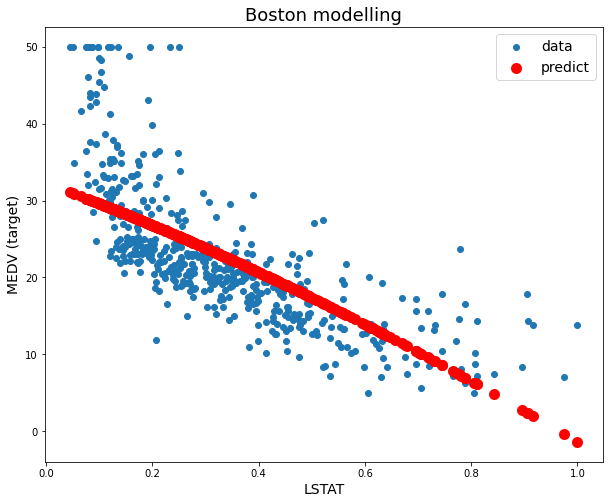

loss =  41.16241695461815


In [ ]:
from IPython.display import clear_output

LEARNING_RATE = 0.5

w = torch.rand(3, requires_grad = True) 
b = torch.rand(1, requires_grad = True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype = torch.double) 
y = torch.tensor(boston.target, dtype = torch.double)


for i in range(100):
  y_pred = (x ** 3) * w[0] + (x ** 2) * w[1] + x * w[2] + b
  loss = torch.mean((y_pred - y) ** 2)
  loss.backward()

  w.data -= LEARNING_RATE * w.grad
  b.data -= LEARNING_RATE * b.grad

  # обнуляем градиенты чтобы на следующем шаги посчитать их заново
  w.grad.data.zero_()
  b.grad.data.zero_()

  # рисуем график
  if ( i + 1 ) % 5 == 0:
    clear_output(True)
    # исходный график
    plt.figure(figsize=(10,8))
    plt.scatter(x.data.numpy(), y.data.numpy(), label = 'data')

    # решение лин регрессии
    plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                color = 'red', linewidths=5, label = 'predict')

    # оформление осей
    plt.xlabel("LSTAT", fontsize=14)
    plt.ylabel("MEDV (target)", fontsize=14)
    plt.title("Boston modelling", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

    print("loss = ", loss.data.numpy())
    
    # тормозим если ошибка маленькая
    if loss.data.numpy() < 0.1:
        print("Done!")
        break

# 4. Моя первая нейронная сеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

**PyTorch** разработал установленные требования взаимодейстивя с данными, которые делают его довольно понятным, независимо от того, работаем с изображениями, текстом или аудио.

*Двумя основными условиями для работы с данными являются* **наборы данных** *и* **загрузчики данных**.

**Набор данных** - это класс Python (наследуется от `torch.utils.data.Dataset`), позволяющий получать данные, которые мы отправляем в нейронную сеть. (пример из документации приводится)

**Загрузчик данных** - это то, что передает данные из набора данных в сеть. (Может включать в себя такую информацию, как: *Сколько рабочих процессов передают данные в сеть? Сколько изображений мы передаем одновременно? (Батчи).*



Вот пример из документации (набор данных):

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
  def __init__(self, x: np.ndarray, y: np.ndarray) -> None:
    self.x = x
    self.y = y

  def __len__(self) -> int:
    return len(self.x)

  def __getitem__(self, idx):
    return {"sample": torch.tensor(self.x[idx, :], dtype = torch.float), "target": self.y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
dataset = RandomDataset(x, y)
print(f"Посмотрим на то, что получилось:\n\n__getitem__\n{dataset.__getitem__(15)}\n\n__len__\n{dataset.__len__()}")

Посмотрим на то, что получилось:

__getitem__
{'sample': tensor([0.9259, 0.6896, 0.3436, 0.0371, 0.3211]), 'target': 0.7228835908950085}

__len__
1000


Теперь займемся __загрузчиками данных__.

Принимают на вход набор данных (`RandomDataset`, унаследованный от __torch.utils.data.Dataset__), размер батча и много чего еще.

In [ ]:
BATSH_SIZE = 4
data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATSH_SIZE)

Один элемент батча выглядит так

In [ ]:
batch = next(iter(data_loader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.5913, 0.7246, 0.3585, 0.4710, 0.8923],
        [0.4520, 0.2570, 0.4430, 0.7926, 0.7673],
        [0.6727, 0.9436, 0.6574, 0.9664, 0.4179],
        [0.2398, 0.4666, 0.1643, 0.3885, 0.2965]])
Target:
tensor([0.3076, 0.8511, 0.3944, 0.0494], dtype=torch.float64)


# 4. Как сделать нейросеть?

Одним из способов реализации нейросети через API является создание класса, унаследованного от __nn.Module.__ Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Для начала напишем сетку в другом виде


In [ ]:
model = nn.Sequential() # иницилизируем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 10-мя на выход
model.add_module("l2", nn.ReLU())         # нелинейное преобразование - функция активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 10-мя нейронами на вход и 1-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [ ]:
# посмoтрим на предсказание модели
model(batch['sample'])
# это предсказания при одном проходе

tensor([[0.0553],
        [0.0598],
        [0.0525],
        [0.1301]], grad_fn=<AddmmBackward0>)

# 5. Как написать цикл обучения и отслеживать метрики

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [ ]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



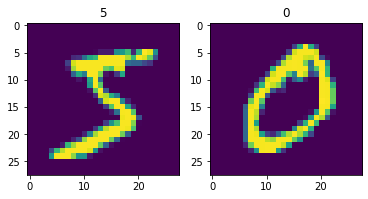

In [ ]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
    nn.Softmax(dim = -1)      # софтмакс для получения вероястностного распределения над метками класса
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

In [ ]:
!pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

     |████████████████████████████████| 1.8 MB 26.3 MB/s 
     |████████████████████████████████| 181 kB 50.0 MB/s 
     |████████████████████████████████| 144 kB 57.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lilpomidorlil (use `wandb login --relogin` to force relogin)


In [72]:
# всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(10):
  for x_train, y_train in tqdm(train_dataloader):      # делаем батч
    y_pred = model(x_train)                            # делаем предсказания
    loss = F.cross_entropy(y_pred, y_train)            # считаем лосс
    loss.backward()                                    # считаем грады обратным проход
    optimizer.step()                                   # обновляем веса модели
    optimizer.zero_grad()                              # обнуляем посчитанные грады

    if epoch % 2 == 0:
      val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
      val_accuracy = []
      with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
          for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
              y_pred = model(x_val)                  # делаем предсказания
              loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
              val_loss.append(loss.numpy())          # добавляем в массив 
              val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
      # скидываем метрики на wandb и автоматом смотрим на графики
      wandb.log({"mean val loss": np.mean(val_loss),
                  "mean val accuracy": np.mean(val_accuracy)})
      
      # печатаем метрики
      print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

Output hidden; open in https://colab.research.google.com to view.